In [1]:
import seaborn as sns
import rpy2.robjects as robjects
import pandas as pd
import numpy as np

# Load Data

4 Steps: 

- Load using Python-R library
- Create Numpy Array
- Create Dictionnary
- Create Data Frame

In [2]:
robjects.r['load']("data/novel/dream.RData")

'dream'


In [3]:
data = robjects.r['dream']
NB_COL = data.nrow

In [4]:
data_array = []
for i in range(data.ncol):
    row = []
#     for j in range(data.nrow):
    for j in range(NB_COL):
        row.append(int(data[i][j]))
    data_array.append(row)
np_data_array = np.array(data_array)
print(np_data_array.shape)
np_data_array

(375, 475)


array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
data_dict = []
for index,name in enumerate(data.names):
    current = {}
    current['_name'] = name
#     for j in range(data.nrow):
    for j in range(NB_COL):
        current['appears_in_scene_'+str(j+1).zfill(3)] = data_array[index][j]
    data_dict.append(current)
# data_dict

In [6]:
df = pd.DataFrame.from_dict(data_dict)
df

,_name,appears_in_scene_001,appears_in_scene_002,appears_in_scene_003,appears_in_scene_004,appears_in_scene_005,appears_in_scene_006,appears_in_scene_007,appears_in_scene_008,appears_in_scene_009,...,appears_in_scene_466,appears_in_scene_467,appears_in_scene_468,appears_in_scene_469,appears_in_scene_470,appears_in_scene_471,appears_in_scene_472,appears_in_scene_473,appears_in_scene_474,appears_in_scene_475
0,chap80,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,贾演,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,贾源,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,贾代化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,贾代善,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,贾代儒,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,贾代修,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,贾敷,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,贾敬,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,贾赦,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Clean Data

To be cleaned: 

- Remove First line (Chap80 separator)
- Characters that never appear (55, example, index 50,贾葛) 
- Characters that appear alone in a scene (1, 金哥)

In [7]:
# print(np_data_array.shape)
# if np_data_array.shape[0] == data.ncol:
#     np_data_array = np.delete(np_data_array,0, axis=0)
# print(np_data_array.shape)
# np_data_array

In [8]:
indexes_to_be_removed = [0]

In [9]:
for index, value in enumerate(np_data_array.sum(axis=1)): #Sum on columns, if sum == 0, the characters never appeared
    if value == 0:
        if index not in indexes_to_be_removed:
            indexes_to_be_removed.append(index)

# Display
print(str(len(indexes_to_be_removed)) + ' rows to remove so far')
print(' '.join([str(a) for a in indexes_to_be_removed]))

56 rows to remove so far
0 50 53 57 90 107 109 119 128 131 134 135 138 146 147 155 161 209 210 217 219 242 245 247 248 252 253 254 255 258 259 260 274 275 281 282 284 285 287 293 297 299 304 305 306 307 308 311 316 323 324 325 328 329 330 335


In [10]:
np_data_array[0] = np.zeros(len(np_data_array[0])) #Fill first line with zeros (Chapter indicator)
for index, value in enumerate(np.dot(np_data_array,np_data_array.T).sum(axis=0)): #Sum on columns, if sum == 1, only one character appears
    if value == 1:
        if index not in indexes_to_be_removed:
            indexes_to_be_removed.append(index)

# Display
print(str(len(indexes_to_be_removed)) + ' rows to remove so far')
print(' '.join([str(a) for a in indexes_to_be_removed]))

57 rows to remove so far
0 50 53 57 90 107 109 119 128 131 134 135 138 146 147 155 161 209 210 217 219 242 245 247 248 252 253 254 255 258 259 260 274 275 281 282 284 285 287 293 297 299 304 305 306 307 308 311 316 323 324 325 328 329 330 335 246


In [11]:
data_dict = []
for index,name in enumerate(data.names):
    if index not in indexes_to_be_removed:
        current = {}
        current['_name'] = name
        for j in range(NB_COL):
            current['appears_in_scene_'+str(j+1).zfill(3)] = data_array[index][j]
        data_dict.append(current)

In [12]:
data_array = np.array([i for j, i in enumerate(np_data_array) if j not in indexes_to_be_removed])
data_array.shape

(318, 475)

In [13]:
df = pd.DataFrame.from_dict(data_dict)
df

,_name,appears_in_scene_001,appears_in_scene_002,appears_in_scene_003,appears_in_scene_004,appears_in_scene_005,appears_in_scene_006,appears_in_scene_007,appears_in_scene_008,appears_in_scene_009,...,appears_in_scene_466,appears_in_scene_467,appears_in_scene_468,appears_in_scene_469,appears_in_scene_470,appears_in_scene_471,appears_in_scene_472,appears_in_scene_473,appears_in_scene_474,appears_in_scene_475
0,贾演,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,贾源,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,贾代化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,贾代善,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,贾代儒,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,贾代修,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,贾敷,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,贾敬,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,贾赦,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,贾政,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0


In [14]:
import pickle
pickle.dump( df, open( "data/novel/data_cleaned.p", "wb" ) )

# Create View 1 - Timeline Matrix

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

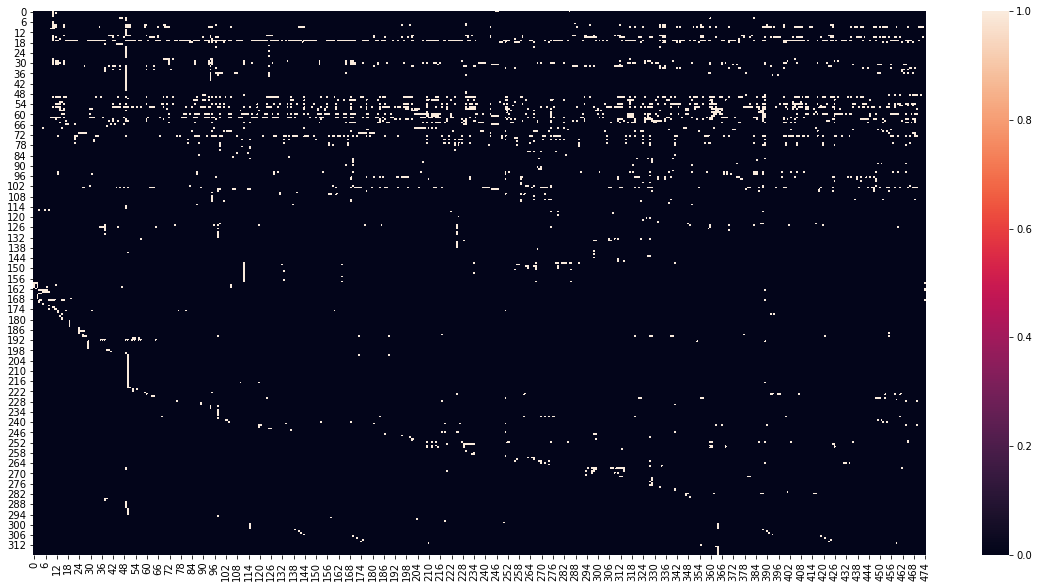

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(data_array)

In [17]:
df['sum']=data_array.sum(axis=1)
print(len(df))
df.head(n=3)

318


,_name,appears_in_scene_001,appears_in_scene_002,appears_in_scene_003,appears_in_scene_004,appears_in_scene_005,appears_in_scene_006,appears_in_scene_007,appears_in_scene_008,appears_in_scene_009,...,appears_in_scene_467,appears_in_scene_468,appears_in_scene_469,appears_in_scene_470,appears_in_scene_471,appears_in_scene_472,appears_in_scene_473,appears_in_scene_474,appears_in_scene_475,sum
0,贾演,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,贾源,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,贾代化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
first_to_appear = []
for character in data_array:
    total = 0
    for index,apparition in enumerate(character):
        if apparition == 1:
            total+=2**(len(character)-index)
    first_to_appear.append(total)
df['first_to_appear'] = first_to_appear
df

,_name,appears_in_scene_001,appears_in_scene_002,appears_in_scene_003,appears_in_scene_004,appears_in_scene_005,appears_in_scene_006,appears_in_scene_007,appears_in_scene_008,appears_in_scene_009,...,appears_in_scene_468,appears_in_scene_469,appears_in_scene_470,appears_in_scene_471,appears_in_scene_472,appears_in_scene_473,appears_in_scene_474,appears_in_scene_475,sum,first_to_appear
0,贾演,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9526820527087378635808097014749653032680048042...
1,贾源,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1190852565885922329476012126843706629085006005...
2,贾代化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9526820527087378635808097014749653032680048042...
3,贾代善,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9526820527087378635808097014749653032680048042...
4,贾代儒,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,2252794126473162073407461524616255509042105123...
5,贾代修,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1732918558825509287236508865089427314647773172...
6,贾敷,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9526820527087378635808097014749653032680048042...
7,贾敬,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,9526820527087378635808097014749653032680048042...
8,贾赦,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,1682079249316900438796691814094015193707580108...
9,贾政,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,69,1682079277709037272630415515480241041144570845...


In [19]:
df = df.sort(columns='sum',ascending=False)

/Users/xavier/anaconda/envs/py35/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [20]:
array_to_plot_sorted_by_total = []
for index,character in df.iterrows():
    current = []
    for a in character.keys():
        if 'appears_in_scene_' in a:
            current.append(character[a])
    array_to_plot_sorted_by_total.append(current)

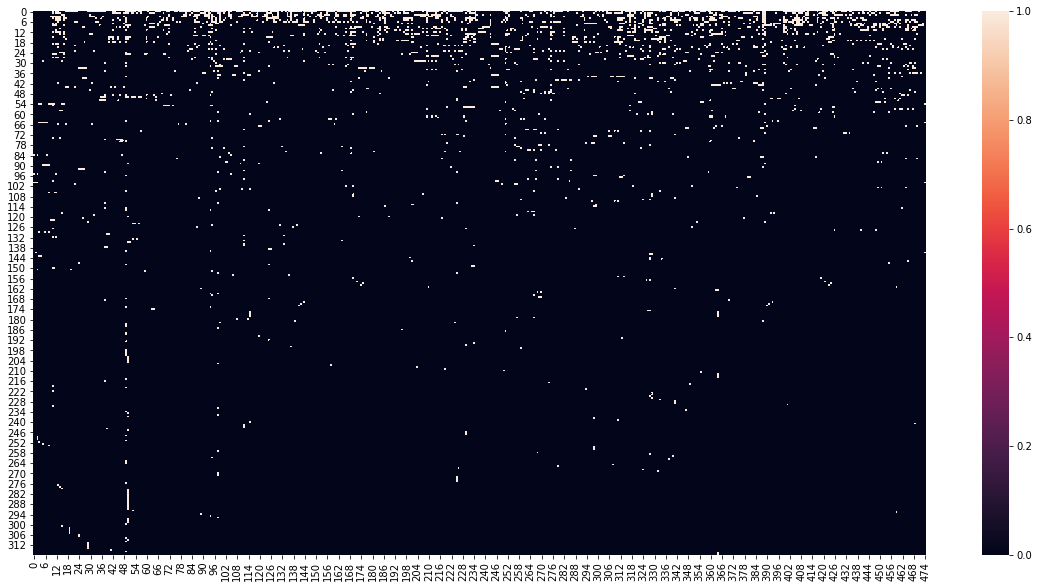

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(array_to_plot_sorted_by_total)

In [22]:
df = df.sort(columns='first_to_appear',ascending=False)

/Users/xavier/anaconda/envs/py35/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [23]:
array_to_plot = []
for index,character in df.iterrows():
    current = []
    for a in character.keys():
        if 'appears_in_scene_' in a:
            current.append(character[a])
    array_to_plot.append(current)

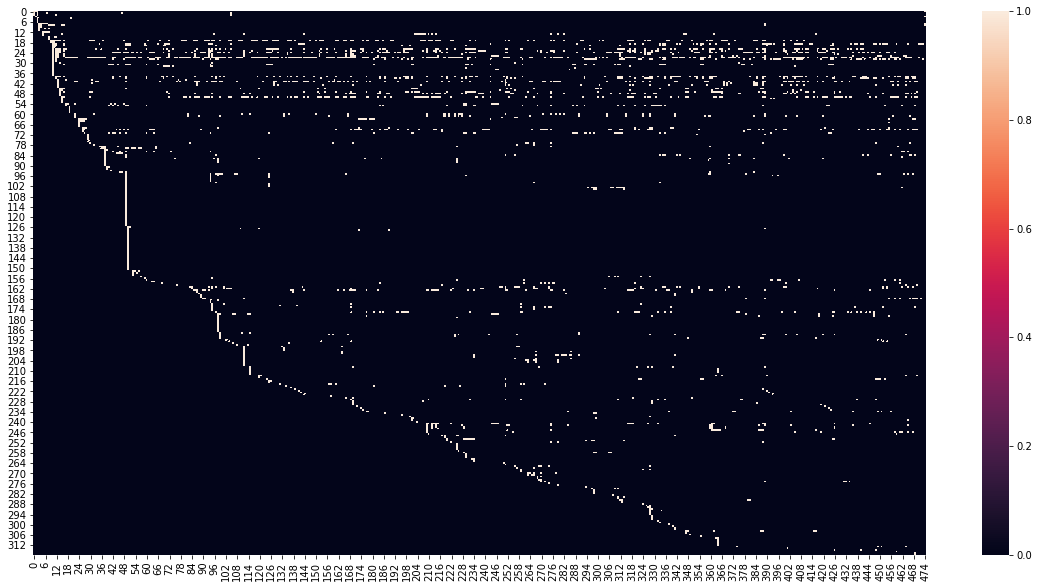

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(array_to_plot)

# Create View 2 - Bible Chart

In [25]:
array_to_plot = np.array(array_to_plot)
co_occurence = np.dot(array_to_plot,array_to_plot.T)
co_occurence.shape

(318, 318)

In [26]:
array_to_plot_sorted_by_total = np.array(array_to_plot_sorted_by_total)
co_occurence_by_sum = np.dot(array_to_plot_sorted_by_total,array_to_plot_sorted_by_total.T)
co_occurence_by_sum.shape

(318, 318)

# Create View 3 - Matrix

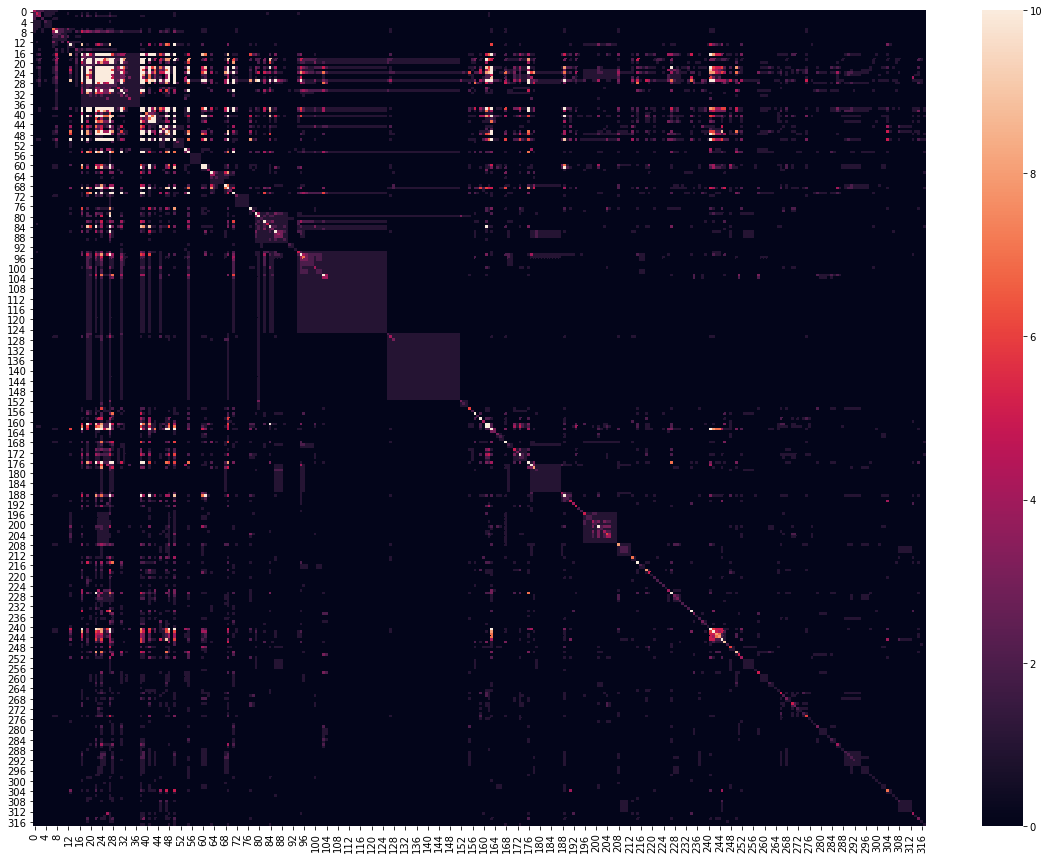

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(data=co_occurence, vmax=10)

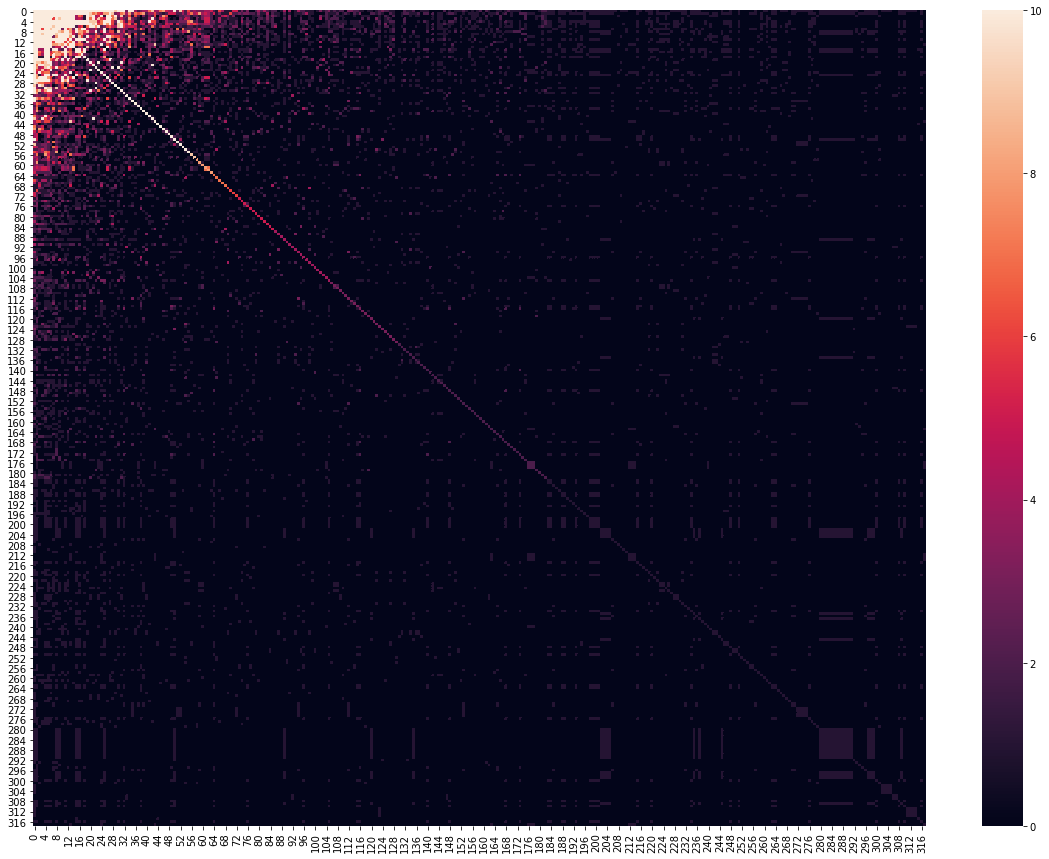

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(data=co_occurence_by_sum, vmax=10)

# View 4 - Force Directed Layout - Hairball

In [29]:
array_to_plot_tsne = np.array(array_to_plot_tsne)
co_occurence_by_tsne = np.dot(array_to_plot_tsne,array_to_plot_tsne.T)
co_occurence_by_tsne.shape

NameError: name 'array_to_plot_tsne' is not defined

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=co_occurence_by_tsne, vmax=10)

In [ ]:
# Create JSON
nodes = []
for index,row in df.iterrows():
    nodes.append({
        'id':row['_name'],
        'group':1
    })

In [ ]:
links = []
n = co_occurence_by_tsne.shape[1]
print(n)
for i in range(n):
    for j in range(n):
        if i > j:
            if co_occurence_by_tsne[i][j] > 0:
                links.append({
                    'source': nodes[i]['id'],
                    'target': nodes[j]['id'],
                    'value': int(co_occurence_by_tsne[i][j])
                })

In [ ]:
import json
output = {
    'nodes':nodes,
    'links':links
}
with open('data/novel/bible.json', 'w') as outfile:
    json.dump(output, outfile)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()